In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
import joblib
pd.set_option('display.max_rows', 500)

In [3]:
data_test = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_scaled_ps/biometry_test_scaled.csv')
data_train = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_scaled_ps/biometry_train_scaled_size.csv')
data_val = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val.csv')

In [4]:
# filter only standard planes

data_test = data_test[(data_test['Class'] == 2) | (data_test['Class'] == 4) | (data_test['Class'] == 6)]
data_train = data_train[(data_train['Class'] == 2) | (data_train['Class'] == 4) | (data_train['Class'] == 6)]
data_val = data_val[(data_val['Class'] == 2) | (data_val['Class'] == 4) | (data_val['Class'] == 6)]

In [35]:
# save data
data_test.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_scaled_test_reg.csv', index=False)
data_train.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_scaled_train_reg.csv', index=False)
data_val.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val_reg.csv', index=False)

In [6]:
data_train = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_train.csv')
data_val = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val.csv')
data_test = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_test.csv')

<AxesSubplot:ylabel='Frequency'>

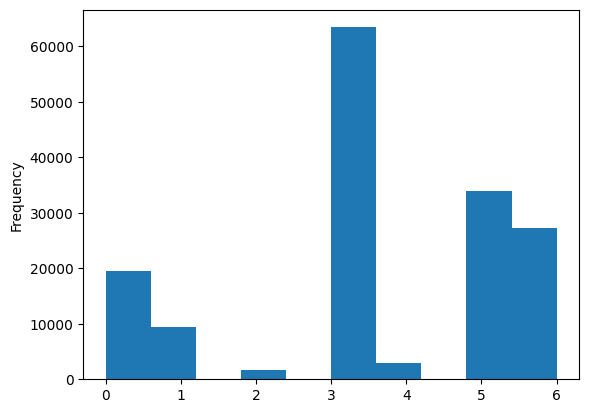

In [5]:
data_train['Class'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

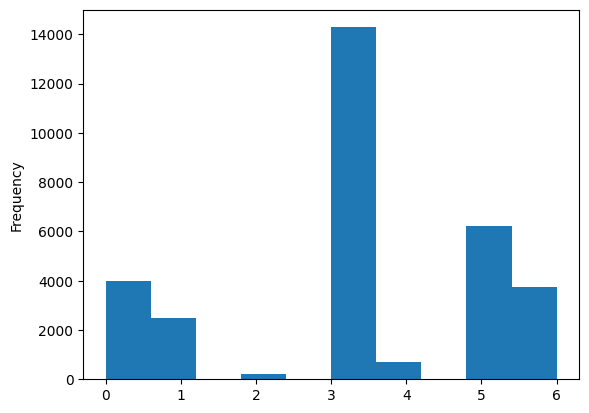

In [9]:
data_test['Class'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

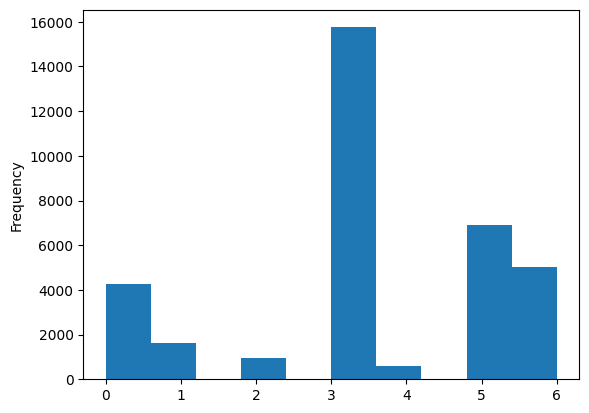

In [10]:
data_val['Class'].plot.hist()

In [4]:
'5_1_18'.split('_')[2]

'18'

In [4]:
data_test = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val.csv')

In [5]:
data_test_new = pd.DataFrame()

In [6]:
data_test_new['index'] = data_test['index']
data_test_new['video'] = data_test['video']
data_test_new['ps'] = data_test['ps']
data_test_new['Class'] = data_test['Class']

In [7]:
data_test_new.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val_eval.csv', index=False)

# Merging day of examination

In [3]:
tab_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/full_fetal_hadlock_post.csv')

In [4]:
tab_data

,ID,Hadlock,HC,BPD,AC,FL,GA_weeks,GA_days,Days_examination,Class_ga
0,10023,3462,33.78,9.85,34.13,7.64,41.0,2.0,289,2.0
1,10024,3068,32.69,9.19,33.18,7.18,37.0,0.0,259,2.0
2,10025,3684,33.96,9.70,35.70,7.53,39.0,5.0,278,2.0
3,10026,3039,31.87,9.16,33.41,7.18,38.0,3.0,269,2.0
4,10027,3273,32.79,9.37,34.98,6.96,38.0,5.0,271,NaN
...,...,...,...,...,...,...,...,...,...,...
793,704,506,19.66,5.41,17.49,3.98,21.0,6.0,153,NaN
794,705,903,24.33,6.38,21.68,4.81,25.0,3.0,178,NaN
795,706,734,22.58,6.06,19.91,4.58,25.0,0.0,175,NaN
796,707,2258,30.83,8.73,30.07,6.35,33.0,1.0,232,NaN


In [74]:
train_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_train.csv')
test_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_test.csv')
val_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val.csv')

In [75]:
new_data = pd.DataFrame()
new_data['ID'] = tab_data['ID'].astype(str)
new_data['days'] = tab_data['Days_examination']

In [77]:
train_data['ID'] = train_data['index'].str.split('_', expand=True)[0]
test_data['ID'] = test_data['index'].str.split('_', expand=True)[0]
val_data['ID'] = val_data['index'].str.split('_', expand=True)[0]

In [78]:
train_data_merged = pd.merge(train_data, new_data, on='ID')
test_data_merged = pd.merge(test_data, new_data, on='ID')
val_data_merged = pd.merge(val_data, new_data, on='ID')

In [79]:
train_data_merged.drop(['ID'], axis=1, inplace=True)
test_data_merged.drop(['ID'], axis=1, inplace=True)
val_data_merged.drop(['ID'], axis=1, inplace=True)

In [80]:
train_data_merged['frame'] = train_data_merged['index'].str.split('_', expand=True)[2].astype(int)
train_data_merged['frame_loc'] = train_data_merged['frame']/train_data_merged['frames_n']

test_data_merged['frame'] = test_data_merged['index'].str.split('_', expand=True)[2].astype(int)
test_data_merged['frame_loc'] = test_data_merged['frame']/test_data_merged['frames_n']

val_data_merged['frame'] = val_data_merged['index'].str.split('_', expand=True)[2].astype(int)
val_data_merged['frame_loc'] = val_data_merged['frame']/val_data_merged['frames_n']

In [81]:
test_data_merged.drop(['frame'], axis=1, inplace=True)
train_data_merged.drop(['frame'], axis=1, inplace=True)
val_data_merged.drop(['frame'], axis=1, inplace=True)

In [82]:
scaler = MinMaxScaler()
days = scaler.fit(train_data_merged['days'].values.reshape(-1, 1))

In [83]:
days_scaled = days.transform(train_data_merged['days'].values.reshape(-1, 1))

In [84]:
train_data_merged['days'] = days_scaled

In [71]:
train_data_merged.drop(['frame'], axis=1, inplace=True)

In [89]:
train_data_merged.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_train.csv', index=False)
test_data_merged.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_test.csv', index=False)
val_data_merged.to_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_val.csv', index=False)

In [92]:
joblib.dump(scaler, 'scaler_days')

['scaler_days']